In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing data

In [3]:
votes = pd.read_csv('data/votes.csv')

In [119]:
print(votes.columns)

Index(['year', 'round', 'from_country_id', 'to_country_id', 'from_country',
       'to_country', 'total_points', 'tele_points', 'jury_points'],
      dtype='object')


In [120]:
contestants = pd.read_csv('./data/contestants.csv')
contestants = contestants.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\\n',  '\n', regex=True)  # replace \\n with \n for newline prints

In [121]:
print(contestants.columns)

Index(['year', 'to_country_id', 'to_country', 'performer', 'song',
       'place_contest', 'sf_num', 'running_final', 'running_sf', 'place_final',
       'points_final', 'place_sf', 'points_sf', 'points_tele_final',
       'points_jury_final', 'points_tele_sf', 'points_jury_sf', 'composers',
       'lyricists', 'lyrics', 'youtube_url'],
      dtype='object')


Participation ranking (don't count 2020 cancelled contest):

In [150]:
participation_ranking = contestants[(contestants['year'] != 2020) & (contestants['year'] > 2010)].groupby('to_country')['year'].nunique().reset_index() 
participation_ranking.columns = ['country', 'participations']
participation_ranking = participation_ranking.sort_values(by='participations', ascending=False)
participation_ranking

,country,participations
0,Albania,12
28,Moldova,12
21,Iceland,12
22,Ireland,12
23,Israel,12
25,Latvia,12
26,Lithuania,12
27,Malta,12
30,Netherlands,12
18,Germany,12


# Without bias from performing country

## Processing data

Voting system changes over time. Change the data to percentage of total points awarded. 

## Correlation matrix

In [67]:
# Create a new DataFrame to store the sum of points given by each country
sum_points_df = votes[(votes['year'] == 2014) & (votes['round'] == 'final')].groupby('from_country').sum().reset_index()['total_points']

# Create another DataFrame to store the count of occurrences for each from_country
count_df = votes[(votes['year'] == 2014) & (votes['round'] == 'final')].groupby('from_country')['total_points'].count().reset_index()

# Merge the two DataFrames to get the sum and count for each country
result_df = pd.merge(sum_points_df, count_df, on='from_country', suffixes=('_sum', '_count'))

# Calculate the average points given away by each country
result_df['average_points_given'] = result_df['total_points_sum'] / result_df['total_points_count']

# Display the result or save it to an array
result_array = result_df['average_points_given'].to_numpy()

print(result_array)

[2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923 2.23076923
 2.23076923]


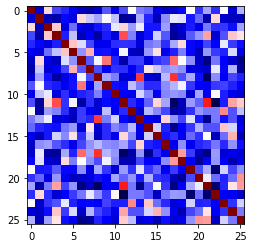

In [69]:

# Pivot the DataFrame to create a matrix of total points given from one country to another
pivot_df = votes[(votes['year'] == 2014) & (votes['round'] == 'final')].pivot_table(index='from_country', columns='to_country', values='total_points', aggfunc='sum', fill_value=0)

# Calculate pairwise correlations
correlation_matrix = pivot_df.corr()

# Convert correlation matrix to a 2D numpy array
correlation_array = correlation_matrix.to_numpy()

plt.imshow(correlation_array, cmap='seismic')

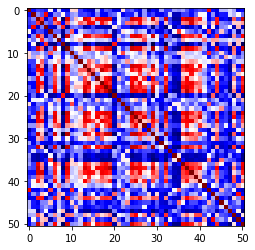

In [82]:
# Pivot the DataFrame to create a matrix of total points given from one country to another
pivot_df = votes[(votes['round'] == 'final')].pivot_table(index='from_country', columns='to_country', values='total_points', aggfunc='sum', fill_value=0)

# Calculate pairwise correlations
correlation_matrix = pivot_df.corr()

# Convert correlation matrix to a 2D numpy array
correlation_array = correlation_matrix.to_numpy()

plt.imshow(correlation_array, cmap='seismic')